# Marketing Campaign Analysis



In [1]:
# !pip install -U scikit-learn==0.23.1
# !pip install -U lazypredict==0.2.9
# !pip install -U imbalanced-learn
# !pip uninstall scikit-learn -y
# !pip install scikit-learn==0.23.1
# !pip uninstall lazypredict -y
# !pip install loras
# !pip install tensorflow
# !pip install keras 
# !pip install mlxtend 
# !pip install tpot
# !pip install catboost
# !pip install shap
#keras==2.6.*
#random seed

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
import seaborn as sns
import time
import itertools

#scikit-learn, scipy
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score,classification_report, f1_score,recall_score,accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.spatial.distance import cdist

#Mlxtend, imblearn, TPOT
from mlxtend.frequent_patterns import apriori, association_rules
from imblearn.over_sampling import SMOTE
from tpot import TPOTClassifier
from tpot.builtins import StackingEstimator

#Neural Network imports
# import keras
# from keras import backend as K
# from keras.models import Sequential
# from keras.layers import Activation, Dropout
# from keras.layers.core import Dense
# from tensorflow.keras.optimizers import Adam, Nadam
# from keras.metrics import categorical_crossentropy
# from keras.callbacks import ModelCheckpoint
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras import regularizers

C:\Users\Filip\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
df = pd.read_csv('../data/marketing_campaign.csv',sep =';')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

We have 3 categorical variables, and 26 numerical variables
We have 24 null values in the Income column.

In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Printing the data points with null values below.

In [5]:
null_income_df = df[df['Income'].isnull()]
print(null_income_df[:10])

        ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10    1994        1983  Graduation        Married     NaN        1         0   
27    5255        1986  Graduation         Single     NaN        1         0   
43    7281        1959         PhD         Single     NaN        0         0   
48    7244        1951  Graduation         Single     NaN        2         1   
58    8557        1982  Graduation         Single     NaN        1         0   
71   10629        1973    2n Cycle        Married     NaN        1         0   
90    8996        1957         PhD        Married     NaN        2         1   
91    9235        1957  Graduation         Single     NaN        1         1   
92    5798        1973      Master       Together     NaN        0         0   
128   8268        1961         PhD        Married     NaN        0         1   

    Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
10   2013-11-15       11         5  ...    

# Handling missing values and Feature Engineering

We will handle missing values by approximating them with KNN. But first we will need to proceed with feature engineering so that we can handle the missing values more accurately.

In [6]:
# HasChild
df.loc[(df['Kidhome'] > 0) | (df['Teenhome'] > 0), 'HasChild'] = "Yes"
df.loc[(df['Kidhome'] == 0) & (df['Teenhome'] == 0), 'HasChild'] = "No"
df.drop(['Kidhome','Teenhome'], axis=1, inplace=True)

#Age
currentYear = datetime.now().year
df['Year_Birth'] = currentYear - df['Year_Birth']
df.rename(columns={'Year_Birth':'Age'}, inplace=True)

#Marital Status
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'In Couple'
if x == 'Together' or x == 'Married' else 'Single')

#Educational Years
def educ_years(x):
    if x == 'Graduation':
        return 12
    elif x == 'PhD':
        return 21
    elif x == 'Master':
        return 18
    elif x == 'Basic':
        return 5
    elif x == '2n Cycle':
        return 8


df['Educational_Years'] = df['Education'].apply(educ_years)


#Spending
df['Spending'] = df['MntFishProducts'] + df['MntMeatProducts'] + df['MntFruits']\
                 + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds']

#Seniority (number of months in company)
currentTime = pd.to_datetime('2015-01-01')
def seniority_func(x):
    date_format = '%Y-%m-%d'
    #convert string to date, find delta
    x = datetime.strptime(x,date_format)
    delta = currentTime - x
    return delta.days / 30.417 #Formula by Google.


df['Seniority'] = df['Dt_Customer'].apply(seniority_func)

#Drop excess columns
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [7]:
df[['Age','Income','Spending','Educational_Years','Seniority']].describe()

,Age,Income,Spending,Educational_Years,Seniority
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000
mean,52.194196,52247.251354,605.798214,14.412500,17.739492
std,11.984069,25173.076661,602.249288,4.510068,6.645051
min,25.000000,1730.000000,5.000000,5.000000,6.115001
25%,44.000000,35303.000000,68.750000,12.000000,12.057402
50%,51.000000,51381.500000,396.000000,12.000000,17.802545
75%,62.000000,68522.000000,1045.500000,18.000000,23.506592
max,128.000000,666666.000000,2525.000000,21.000000,29.095572


Text(0.5, 1.0, 'Seniority boxplot')

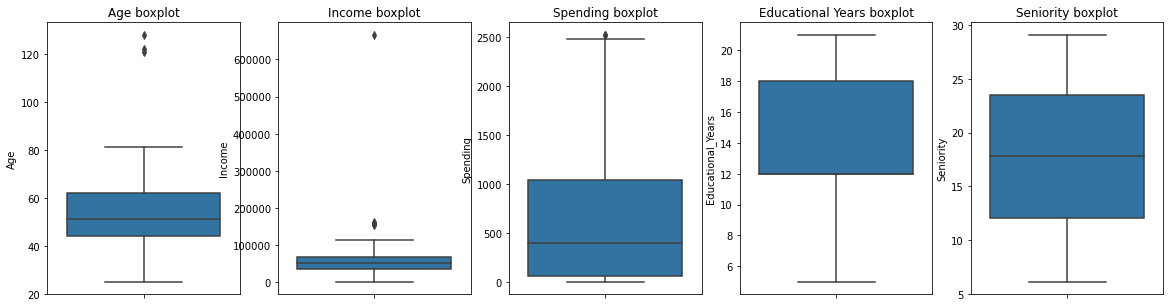

In [8]:
f, axes = plt.subplots(ncols=5, figsize=(20,5))
sns.boxplot(y="Age",data=df,ax=axes[0])
axes[0].set_title("Age boxplot")

sns.boxplot(y="Income",data=df,ax=axes[1])
axes[1].set_title("Income boxplot")

sns.boxplot(y="Spending",data=df,ax=axes[2])
axes[2].set_title("Spending boxplot")

sns.boxplot(y="Educational_Years",data=df,ax=axes[3])
axes[3].set_title("Educational Years boxplot")

sns.boxplot(y="Seniority",data=df,ax=axes[4])
axes[4].set_title("Seniority boxplot")

We will remove the extreme outlier in the income feature which is 666k. All other outliers are mild and acceptible, so there is no need for IQR.

In [9]:
df = df.drop(df[df.Income == max(df.Income)].index)

## Handling missing values
Since we found missing values in the Income feature, we will approximate them with KNN.

In [10]:
imputer = KNNImputer(n_neighbors=5,metric='nan_euclidean')
# fit on the dataset
imputer.fit(df[['Income', 'Age', 'Educational_Years', 'Spending']])
# transform the dataset
X = imputer.transform(df[['Income', 'Age', 'Educational_Years', 'Spending']])
Income_impute = pd.DataFrame(X, columns=['Income', 'Age', 'Educational_years', 'Spending'])
df['Income'] = Income_impute['Income'].reset_index(drop=True)

print(df.isnull().sum())
print(df[df['Income'] == None])
df = df.dropna()

Age                    0
Education              0
Marital_Status         0
Income                 1
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
HasChild               0
Educational_Years      0
Spending               0
Seniority              0
dtype: int64
Empty DataFrame
Columns: [Age, Education, Marital_Status, Income, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, Acc

## Data Scaling
Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

Normalization scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision.

### Should we normalize or standardize?
If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized.
We will use StandardScaler to normalize the data. The features we are going to normalize are Income, Age, Educational_Years, Spending, and Seniority.

### Why not both?
It may be desirable to normalize data after it has been standardized.

This might be a good idea of you have a mixture of standardized and normalized variables and wish all input variables to have the same minimum and maximum values as input for a given algorithm, such as an algorithm that calculates distance measures.

We will explore the benefits of standardizing and then normalizing the data.

![title](../standardization_vs_normalization.png)

In [11]:
#Standardization
scaler = StandardScaler()
scaled_df = df.copy()
col_names = ['Income','Spending', 'Seniority']
features = scaled_df[col_names]
scaler = scaler.fit(features.values)
features = scaler.transform(features.values)
scaled_df[col_names] = features

#Normalization
transformer = Normalizer()
col_names = ['Income','Spending', 'Seniority']
features = scaled_df[col_names]
transformer = transformer.fit(features.values)
features = transformer.transform(features.values)
scaled_df[col_names] = features

In [12]:
scaled_df[['Income','Spending','Seniority']].describe()

,Income,Spending,Seniority
count,2238.000000,2238.000000,2238.000000
mean,-0.017551,-0.078715,0.000638
std,0.550553,0.567155,0.607590
min,-0.991569,-0.998583,-0.999298
25%,-0.541238,-0.545059,-0.589558
50%,-0.022951,-0.334403,0.009035
75%,0.496327,0.511063,0.563609
max,0.986625,0.954710,0.999008


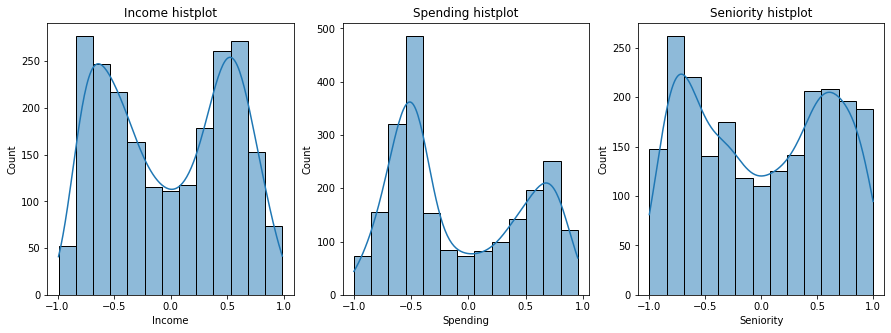

In [13]:
f, axes = plt.subplots(ncols=3, figsize=(15,5))
sns.histplot(x="Income",data=scaled_df,ax=axes[0], kde=True)
axes[0].set_title("Income histplot")

sns.histplot(x="Spending",data=scaled_df,ax=axes[1], kde=True)
axes[1].set_title("Spending histplot")

sns.histplot(x="Seniority",data=scaled_df,ax=axes[2], kde=True)
axes[2].set_title("Seniority histplot")
plt.show()

# Clustering
We will try different clustering algorithms. First we need to determine the optimal value of K for the number of clusters.

C:\Users\Filip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\Filip\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


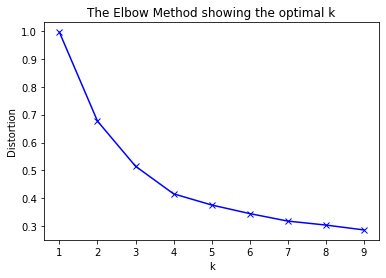

In [14]:
#Elbow method for determining the number of clusters
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(scaled_df[col_names])
    kmeanModel.fit(scaled_df[col_names])
    distortions.append(sum(np.min(cdist(scaled_df[col_names], kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / scaled_df[col_names].shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


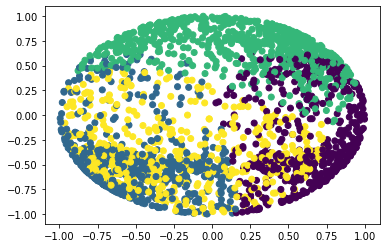

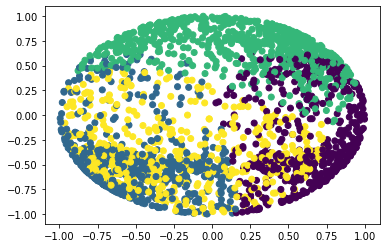

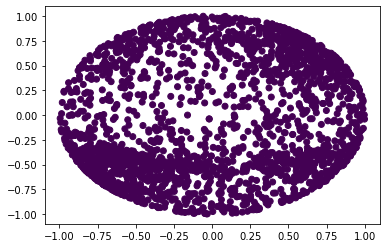

In [32]:
#KMEANS++
kmeanModel = KMeans(n_clusters=4, init="k-means++", max_iter=2000, random_state=42).fit(features)
labels = kmeanModel.predict(features)
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis')
plt.show()

#Gaussian Mixture
gmm=GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=42).fit(features)
labels_gmm = gmm.predict(features)
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis')
plt.show()

#DBSCAN
dbscan = DBSCAN(eps=0.5).fit(features)
plt.scatter(features[:, 0], features[:, 1], c=dbscan.labels_, cmap='viridis')

# Clustering Evaluation

We will use the Silhouette score to evaluate the clustering algorithms formally, though it is also evident through the cluster visualizations above that Kmeans++ and GMM have similiar, almost identical performance, and DBSCAN is performing poorly due to the variation of density in the data. The silhouette score should also reflect this observation.

We are using the cosine distance metric because in higher dimensions, euclidian distances have very little meaning since they are often very close together.

In [34]:
print('kmeans: {}'.format(silhouette_score(features, kmeanModel.labels_,
                                           metric='cosine')))

# print('GMM: {}'.format(silhouette_score(features, labels_gmm,
#                                            metric='cosine')))

# print('DBSCAN: {}'.format(silhouette_score(features, dbscan.labels_,
#                                            metric='cosine')))

kmeans: 0.5000856646752737


# Cluster Interpretation

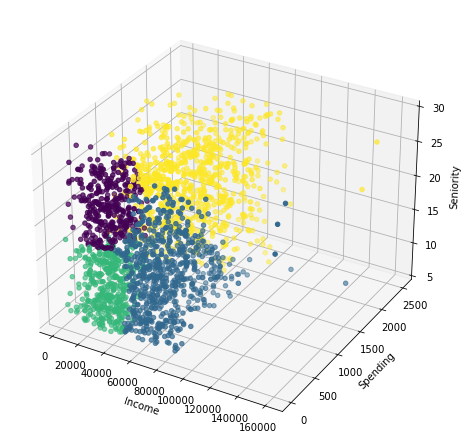

In [35]:
scaled_df['Cluster'] = labels_gmm
df['Cluster'] = labels_gmm

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

x = df['Income']
y = df['Spending']
z = df['Seniority']
c = df['Cluster']

ax.set_xlabel("Income")
ax.set_ylabel("Spending")
ax.set_zlabel("Seniority")

ax.scatter(xs=x,ys=y,zs=z,c=c)

Now that we have segmented our customers it would be nice if we would know what makes each cluster unique. This will help us understand which types of customers we have.

In [36]:
df_mean = (df.groupby('Cluster').mean())
df_mean['Count'] = df['Cluster'].value_counts()
df_mean['Percent'] = (df_mean['Count'] / df_mean['Count'].sum())*100
print(df_mean[['Income','Spending','Seniority','Count','Percent']])

               Income     Spending  Seniority  Count    Percent
Cluster                                                        
0        33216.074783   173.101449  23.289703    345  15.429338
1        67550.529582   374.647908  14.174262    693  30.992844
2        32698.217949   120.358974  11.946592    390  17.441860
3        55689.775990  1224.644802  21.217576    808  36.135957


In [37]:
def cluster_func(x):
    if x == 0:
        return 'Stars'
    elif x == 3:
        return 'Leaky bucket'
    elif x == 2:
        return 'High potential'
    elif x == 1:
        return 'Need attention'

df['Cluster'] = df['Cluster'].apply(cluster_func)

- Cluster0 (**Stars**) are customers with **high** Income, Spending and Seniority. We have 535 such instances, or 23,9%
- Cluster1 (**Need attention**) are customers with **low** Income, Spending and Seniority. We have 653 such instances, or 29,1%
- Cluster2 (**High potential**) are customers with **high** Income and Spending, and **low** Seniority. We have 462 such instances, or 20,6%
- Cluster3 (**Leaky bucket**) are customers with **low** Income and Spending, and **high** Seniority. We have 588 such instances or 26,7%



As we can see, the cluster with the most customers is Cluster1 which are low income,spending and seniority.
The cluster with the least customers is Cluster2, which are high in spending and income, and low in seniority.

The stars cluster is our best marketing target, since they are our old customers who are spending a lot.
The high potential cluster is the second best marketing target, because they are spending a lot, but they are newer and require some attention.

# Association rule mining

Association rule learning is a rule-based machine learning method for discovering interesting relations between variables in large databases. Association Rules are one of the most important concepts of machine learning being used in market basket analysis.

An association rule consists of an **antecedent and consequent.** Ex. {X → Y} is a representation of finding Y on the basket which has X on it

Various metrics are in place to help us understand the strength of association between these two.

- **Support** gives an idea of how frequent an itemset is in all the transactions.
- **Confidence** gives the probability of occurrence of {Y} given {X} is present

## Apriori Algorithm
We will proceed to profile the customers, by using the apriori algorithm.
The apriori algorithm is used for association rule mining. For this we will use the mlxtend library, but first we need to bin the features.

In [38]:
q1,q3 = df['MntWines'].quantile([0.25,0.75])

def bin_func(x):
    if x == 0:
        return "Non consumer"

    if x <= q1:
        return "Low consumer"
    elif q1 < x <= q3:
        return "Frequent consumer"
    else:
        return "Biggest consumer"

df_bin = df[['Education','Marital_Status','HasChild','Cluster']]
df_bin['WineGroup'] = df['MntWines'].apply(bin_func)

q1, q3 = df['MntFruits'].quantile([0.25,0.75])
df_bin['FruitGroup'] = df['MntFruits'].apply(bin_func)

q1, q3 = df['MntMeatProducts'].quantile([0.25,0.75])
df_bin['MeatGroup'] = df['MntMeatProducts'].apply(bin_func)

q1, q3 = df['MntFishProducts'].quantile([0.25,0.75])
df_bin['FishGroup'] = df['MntFishProducts'].apply(bin_func)

q1, q3 = df['MntSweetProducts'].quantile([0.25,0.75])
df_bin['SweetGroup'] = df['MntSweetProducts'].apply(bin_func)

q1, q3 = df['MntGoldProds'].quantile([0.25,0.75])
df_bin['GoldGroup'] = df['MntGoldProds'].apply(bin_func)

def bin_senior_func(x):

    if x <= q1:
        return "New customer"
    elif q1 < x <= q3:
        return "Experienced customer"
    else:
        return "Old customer"

q1, q3 = df['Seniority'].quantile([0.25,0.75])
df_bin['SeniorityGroup'] = df['Seniority'].apply(bin_senior_func)
#df.drop(['Seniority'],axis=1,inplace=True)

def bin_income_func(x):
    if x <= q1:
        return "Low income"
    elif q1 < x <= q2:
        return "Low to medium income"
    elif q2 < x <= q3:
        return "Medium to high income"
    else:
        return "High income"

q1,q2,q3 = df['Income'].quantile([0.25,0.5,0.75])
df_bin['IncomeGroup'] = df['Income'].apply(bin_income_func)
#df.drop(['Income'],axis=1,inplace=True)

def bin_age_func(x):
    if x <= 18:
        return "Youth"
    elif 18 < x <= 35:
        return "Young adult"
    elif 35 < x <= 65:
        return "Adult"
    else:
        return "Senior"

pd.set_option('display.max_columns', None)
df_bin['AgeGroup'] = df['Age'].apply(bin_age_func)
print(df_bin.head())

    Education Marital_Status HasChild         Cluster          WineGroup  \
0  Graduation         Single       No    Leaky bucket   Biggest consumer   
1  Graduation         Single      Yes  High potential       Low consumer   
2  Graduation      In Couple       No  Need attention  Frequent consumer   
3  Graduation      In Couple      Yes  High potential       Low consumer   
4         PhD      In Couple      Yes  Need attention  Frequent consumer   

          FruitGroup          MeatGroup          FishGroup         SweetGroup  \
0   Biggest consumer   Biggest consumer   Biggest consumer   Biggest consumer   
1       Low consumer       Low consumer       Low consumer       Low consumer   
2   Biggest consumer  Frequent consumer   Biggest consumer  Frequent consumer   
3  Frequent consumer  Frequent consumer  Frequent consumer  Frequent consumer   
4   Biggest consumer  Frequent consumer  Frequent consumer  Frequent consumer   

           GoldGroup        SeniorityGroup            In

In [39]:
df_assoc = pd.get_dummies(df_bin)

#Apriori min support
min_support = 0.08

#Max lenght of apriori n-grams
max_len = 10

frequent_items = apriori(df_assoc, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

In [40]:
# We select the product and the segment we want to analyze, first we will analyze biggest wine consumers.
product='WineGroup'
segment='Biggest consumer'
target = product + "_" + segment

results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
print(results_personnal_care.head(5))

                                                                       antecedents  \
7266               (Cluster_Leaky bucket, HasChild_No, MeatGroup_Biggest consumer)   
8984            (Cluster_Leaky bucket, AgeGroup_Adult, MeatGroup_Biggest consumer)   
1822                                           (Cluster_Leaky bucket, HasChild_No)   
2676                            (Cluster_Leaky bucket, MeatGroup_Biggest consumer)   
6044  (Cluster_Leaky bucket, MeatGroup_Biggest consumer, Marital_Status_In Couple)   

                       consequents  antecedent support  consequent support  \
7266  (WineGroup_Biggest consumer)            0.149374            0.248658   
8984  (WineGroup_Biggest consumer)            0.135957            0.248658   
1822  (WineGroup_Biggest consumer)            0.181127            0.248658   
2676  (WineGroup_Biggest consumer)            0.207513            0.248658   
6044  (WineGroup_Biggest consumer)            0.129696            0.248658   

       support

## <span style="color:maroon;">Biggest consumer of wine customer profile</span>
- High income, above 68445$
- Enrolled with the company for more than 99 months
- Also a big consumer of meat products
- In the adult age group, from 35 to 65 years of age


In [41]:
product='FruitGroup'
segment='Biggest consumer'
target = product + "_" + segment

results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

print(results_personnal_care.head(5))

                                                                                                       antecedents  \
16574  (SweetGroup_Biggest consumer, MeatGroup_Biggest consumer, Cluster_Leaky bucket, FishGroup_Biggest consumer)   
9884                                     (SweetGroup_Biggest consumer, AgeGroup_Adult, MeatGroup_Biggest consumer)   
9858                         (SweetGroup_Biggest consumer, MeatGroup_Biggest consumer, FishGroup_Biggest consumer)   
9896                                     (SweetGroup_Biggest consumer, AgeGroup_Adult, FishGroup_Biggest consumer)   
9872                                      (AgeGroup_Adult, MeatGroup_Biggest consumer, FishGroup_Biggest consumer)   

                         consequents  antecedent support  consequent support  \
16574  (FruitGroup_Biggest consumer)            0.108229            0.246422   
9884   (FruitGroup_Biggest consumer)            0.108676            0.246422   
9858   (FruitGroup_Biggest consumer)            0.1

## <span style="color:green;">Biggest consumer of fruit customer profile</span>
- Big consumer of sweets
- Big consumer of fish
- Big consumer of meat
- In the adult age group, from 35 to 65 years of age



In [42]:
product='MeatGroup'
segment='Biggest consumer'
target = product + "_" + segment

results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

print(results_personnal_care.head(5))

                                                                                        antecedents  \
7281                               (Cluster_Leaky bucket, HasChild_No, FruitGroup_Biggest consumer)   
7323                                (Cluster_Leaky bucket, HasChild_No, FishGroup_Biggest consumer)   
7337                               (Cluster_Leaky bucket, HasChild_No, SweetGroup_Biggest consumer)   
14569  (SweetGroup_Biggest consumer, HasChild_No, Cluster_Leaky bucket, FishGroup_Biggest consumer)   
7391                         (HasChild_No, FruitGroup_Biggest consumer, FishGroup_Biggest consumer)   

                        consequents  antecedent support  consequent support  \
7281   (MeatGroup_Biggest consumer)            0.113596            0.249553   
7323   (MeatGroup_Biggest consumer)            0.122540            0.249553   
7337   (MeatGroup_Biggest consumer)            0.122093            0.249553   
14569  (MeatGroup_Biggest consumer)            0.094365          

## <span style="color:red;">Biggest consumer of meat customer profile</span>
- Has no children
- High income, above 68445$
- New customer, enrolled with the company for around 88 months (Cluster High Potential)
- Big consumer of fish products
- Big consumer of wine products
- Big consumer of fruit products

In [43]:
product='FishGroup'
segment='Biggest consumer'
target = product + "_" + segment

results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

print(results_personnal_care.head(8))

                                                                                                        antecedents  \
16572  (SweetGroup_Biggest consumer, MeatGroup_Biggest consumer, Cluster_Leaky bucket, FruitGroup_Biggest consumer)   
7419                                        (SweetGroup_Biggest consumer, HasChild_No, FruitGroup_Biggest consumer)   
9860                         (SweetGroup_Biggest consumer, MeatGroup_Biggest consumer, FruitGroup_Biggest consumer)   
7376                                               (Cluster_Leaky bucket, HasChild_No, SweetGroup_Biggest consumer)   
14566                  (SweetGroup_Biggest consumer, HasChild_No, MeatGroup_Biggest consumer, Cluster_Leaky bucket)   
9064                               (Cluster_Leaky bucket, SweetGroup_Biggest consumer, FruitGroup_Biggest consumer)   
7392                                         (HasChild_No, MeatGroup_Biggest consumer, FruitGroup_Biggest consumer)   
7432                                         (Sw

## <span style="color:salmon;">Biggest consumer of fish customer profile</span>
- Big consumer of sweet products
- Big consumer of fruit products
- Big consumer of meat products
- Has no children
- In the adult age group, 35 to 65 years


In [44]:
product='SweetGroup'
segment='Biggest consumer'
target = product + "_" + segment

results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

print(results_personnal_care.head(5))

                                                                                                       antecedents  \
16576  (Cluster_Leaky bucket, FishGroup_Biggest consumer, MeatGroup_Biggest consumer, FruitGroup_Biggest consumer)   
9861                         (FruitGroup_Biggest consumer, MeatGroup_Biggest consumer, FishGroup_Biggest consumer)   
9063                               (Cluster_Leaky bucket, FruitGroup_Biggest consumer, FishGroup_Biggest consumer)   
7421                                        (HasChild_No, FruitGroup_Biggest consumer, FishGroup_Biggest consumer)   
9139                                            (Cluster_Leaky bucket, AgeGroup_Adult, FishGroup_Biggest consumer)   

                         consequents  antecedent support  consequent support  \
16576  (SweetGroup_Biggest consumer)            0.100179                0.25   
9861   (SweetGroup_Biggest consumer)            0.114937                0.25   
9063   (SweetGroup_Biggest consumer)            0.1

## <span style="color:Fuchsia;">Biggest consumer of sweets customer profile</span>
- Big consumer of fruit products
- Big consumer of fish products
- Has no children
- Adult age group, 35 to 65 years old


# Response Prediction
Now we will try to predict whether the customer will respond to our marketing campaign or not. We will explore which features are most correlated with the Response feature which will be our label.

In [45]:
print('No Responses', round(df['Response'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Responses', round(df['Response'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')

No Responses 85.11 % of the dataset
Responses 14.89 % of the dataset


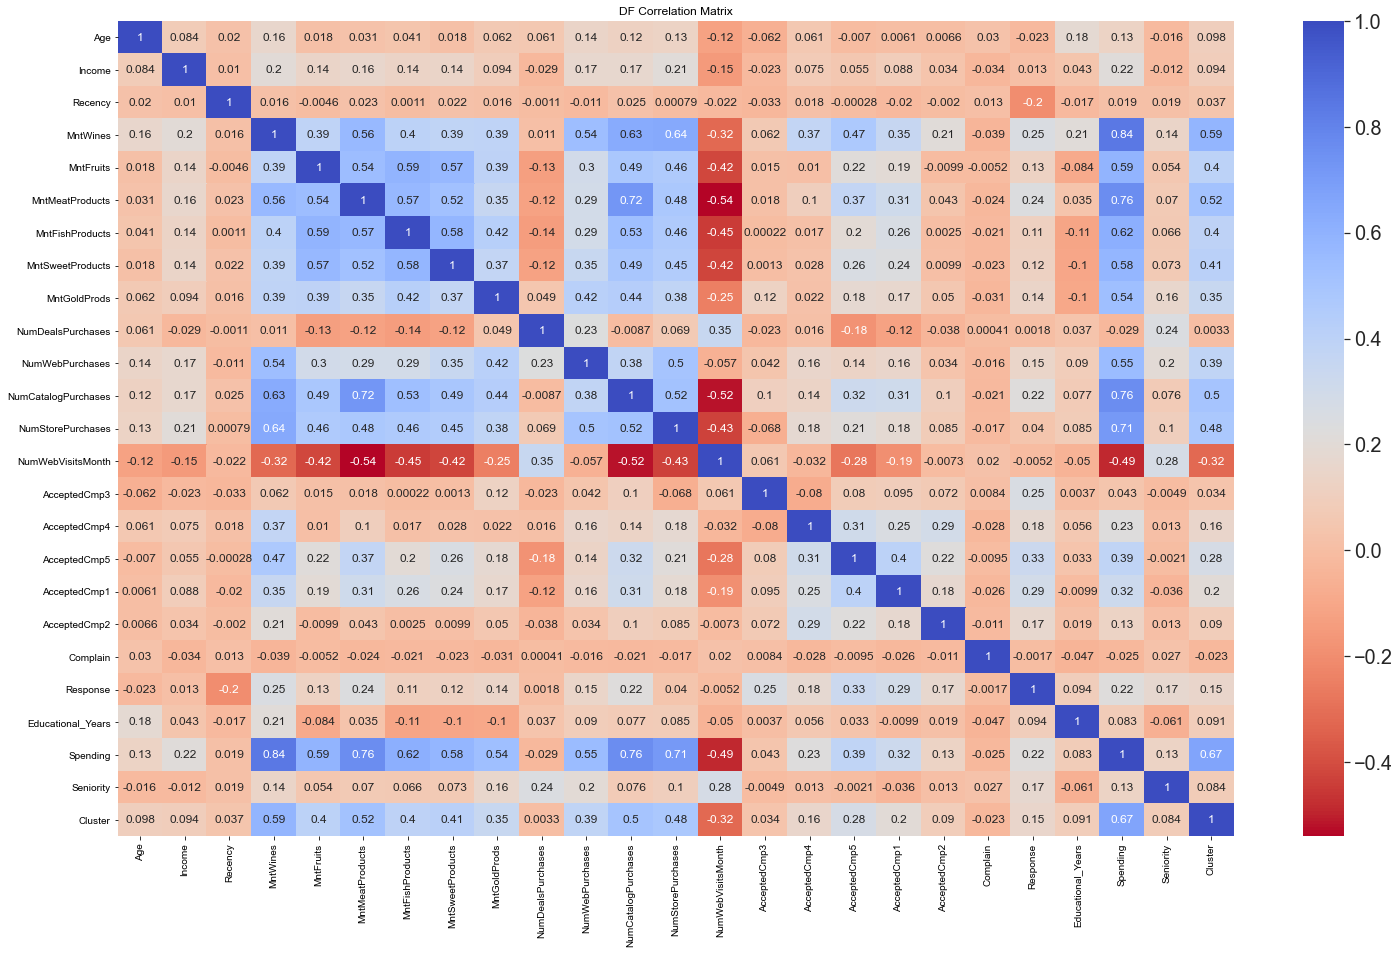

In [46]:
f,  ax2 = plt.subplots(1, 1, figsize=(25, 15))
corr = scaled_df.corr()
sns.set(font_scale=1.8)
sns.heatmap(corr,cmap='coolwarm_r', annot_kws={'size':12}, ax=ax2, annot=True)
ax2.set_title('DF Correlation Matrix', fontsize=12)
plt.show()

Ponovo cemo izvrsiti standardizaciju i normalizaciju za jos feature-a.

In [47]:
scaled_df = df.copy()
#Standardization
scaler = StandardScaler()
scaled_df = df.copy()
col_names = ['Age','MntWines','MntFruits','MntMeatProducts',
             'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases']
features = scaled_df[col_names]
scaler = scaler.fit(features.values)
features = scaler.transform(features.values)
scaled_df[col_names] = features
"""
#Normalization
transformer = Normalizer()
col_names = ['Age','MntWines','MntFruits','MntMeatProducts',
             'MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases']
features = scaled_df[col_names]
transformer = transformer.fit(features.values)
features = transformer.transform(features.values)
scaled_df[col_names] = features"""

scaled_df.drop(['Education','Dt_Customer'],axis=1,inplace=True)
scaled_df = pd.get_dummies(scaled_df, columns=['Marital_Status','HasChild','Cluster'])
X = scaled_df.drop('Response',axis=1)
y = scaled_df['Response']

In [48]:
scaled_df.head()

,Age,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Educational_Years,Spending,Seniority,Marital_Status_In Couple,Marital_Status_Single,HasChild_No,HasChild_Yes,Cluster_High potential,Cluster_Leaky bucket,Cluster_Need attention,Cluster_Stars
0,0.985690,58138.0,58,0.982478,1.549843,1.677922,2.460430,1.474763,0.842017,0.349216,8,10,4,7,0,0,0,0,0,0,1,12,1617,27.912023,0,1,1,0,0,1,0,0
1,1.236050,46344.0,38,-0.870853,-0.636497,-0.713482,-0.650597,-0.631924,-0.729257,-0.168244,1,1,2,5,0,0,0,0,0,0,0,12,27,9.830029,0,1,0,1,1,0,0,0
2,0.318063,71613.0,26,0.361731,0.569760,-0.177630,1.344121,-0.147628,-0.039429,-0.685703,8,2,10,4,0,0,0,0,0,0,0,12,776,16.372423,1,0,1,0,0,0,1,0
3,-1.267551,26646.0,26,-0.870853,-0.561106,-0.651482,-0.504196,-0.583494,-0.748419,-0.168244,2,0,4,6,0,0,0,0,0,0,0,12,53,10.684814,1,0,0,1,1,0,0,0
4,-1.017191,58293.0,94,-0.389700,0.418978,-0.217487,0.154610,-0.002339,-0.556800,1.384135,5,3,6,5,0,0,0,0,0,0,0,21,422,11.408094,1,0,0,1,0,0,1,0


We're using **StratifiedKFold** to shuffle the data once and then split it into 5 equal parts.

In [49]:
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)  # koristim 5 splitova

#Split into train and test set
for train_index, test_index in skf.split(X, y):
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


# Split into validation set
for train_index, val_index in skf.split(original_Xtrain, original_ytrain):
    original_Xtrain, original_Xval = X.iloc[train_index], X.iloc[val_index]
    original_ytrain, original_yval = y.iloc[train_index], y.iloc[val_index]
    
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values
original_Xval = original_Xval.values
original_yval = original_yval.values

print(original_Xtrain.shape)
print(original_Xtest.shape)
print(original_Xval.shape)

# SMOTE
strategy = {0 : 5000, 1 : 5000}
sm = SMOTE(random_state=42, sampling_strategy=strategy)
X_sm, y_sm = sm.fit_resample(original_Xtrain,original_ytrain)

(1812, 31)
(223, 31)
(201, 31)


C:\Users\Filip\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (5000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 1542)
  warnings.warn(
C:\Users\Filip\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (5000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 1542)
  warnings.warn(


In [56]:
for train_index, test_index in skf.split(X, y):
    #print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# LoRAS
skf_df = original_Xtrain
skf_df['Response'] = original_ytrain
# Separate the labels from features.
skf_df['Response'] = y
skf_df_val = skf_df.values
labels, features =skf_df_val[:,31], skf_df_val[:,:31]

# Positive Response
label_1=np.where(labels == 1)[0]
label_1=list(label_1)
print((len(label_1)))
features_1=features[label_1]
features_1_train=features_1[list(range(0,round(len(label_1)/2)))] # od 0 do len(label_1)/2
features_1_test=features_1[list(range(round(len(label_1)/2),len(label_1)))] # od len(label_1)/2 do len(label_1)

# Negative Response
label_0=np.where(labels == 0)[0]
label_0=list(label_0)
print(len(label_0))
features_0=features[label_0]
features_0_train=features_0[list(range(0,round(len(label_0)/2)))]
features_0_test=features_0[list(range(round(len(label_0)/2),len(label_0)))]

training_data=np.concatenate((features_1_train,features_0_train))
test_data=np.concatenate((features_1_test,features_0_test))
training_labels=np.concatenate((np.zeros(round(len(label_1)/2))+1, np.zeros(round(len(label_0)/2))))
test_labels=np.concatenate((np.zeros(round(len(label_1)/2))+1, np.zeros(round(len(label_0)/2))))

import loras
min_class_points = features_1_train
maj_class_points = features_0_train

#LoRAS
loras_min_class_points = loras.fit_resample(maj_class_points, min_class_points)
# print(loras_min_class_points.shape)
LoRAS_feat = np.concatenate((loras_min_class_points, maj_class_points))
LoRAS_labels = np.concatenate((np.zeros(len(loras_min_class_points))+1, np.zeros(len(maj_class_points))))
print(LoRAS_feat.shape)
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

300
1713
(2056, 31)


In [75]:
from imblearn.pipeline import make_pipeline
from tpot.builtins import StackingEstimator
                          
test_pipeline = make_pipeline(
    StandardScaler(),
    StackingEstimator(estimator=GaussianNB()),
    MLPClassifier(alpha=0.001, learning_rate_init=0.001, max_iter=200, random_state=42)
)
test_pipeline.fit(X_sm,y_sm)
#mlp_c = MLPClassifier(alpha=0.001, learning_rate_init=0.001, max_iter=400, random_state=42)

predictions_test = test_pipeline.predict(original_Xtest)
predictions_val = test_pipeline.predict(original_Xval)
print("TEST SCORES: ")
print(f1_score(original_ytest, predictions_test))
print(classification_report(original_ytest, predictions_test))
print("VAL SCORES: ")
print(f1_score(original_yval, predictions_val))
print(classification_report(original_yval, predictions_val))

TEST SCORES: 
0.5757575757575758
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       190
           1       0.58      0.58      0.58        33

    accuracy                           0.87       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.87      0.87      0.87       223

VAL SCORES: 
0.6956521739130436
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       167
           1       0.69      0.71      0.70        34

    accuracy                           0.90       201
   macro avg       0.81      0.82      0.82       201
weighted avg       0.90      0.90      0.90       201



C:\Users\Filip\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [76]:
pipeline_optimizer = TPOTClassifier()
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2, scoring='f1')

pipeline_optimizer.fit(X_sm, y_sm)
print(pipeline_optimizer.score(original_Xtest, original_ytest))
pipeline_optimizer.export('tpot_smote_pipeline_f1_50_100.py')

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.7500000000000001, min_samples_leaf=6, min_samples_split=14, n_estimators=100)
0.5846153846153846


Train data length:  10000
Test data length:  223
Num Features:  31
Epoch 1/350
63/63 - 1s - loss: 0.7308 - acc: 0.5117 - val_loss: 0.7610 - val_acc: 0.3570 - 685ms/epoch - 11ms/step
Epoch 2/350
63/63 - 0s - loss: 0.7241 - acc: 0.5570 - val_loss: 0.7628 - val_acc: 0.3045 - 50ms/epoch - 794us/step
Epoch 3/350
63/63 - 0s - loss: 0.7168 - acc: 0.5955 - val_loss: 0.7637 - val_acc: 0.2895 - 50ms/epoch - 794us/step
Epoch 4/350
63/63 - 0s - loss: 0.7113 - acc: 0.6255 - val_loss: 0.7627 - val_acc: 0.2890 - 50ms/epoch - 794us/step
Epoch 5/350
63/63 - 0s - loss: 0.7054 - acc: 0.6367 - val_loss: 0.7606 - val_acc: 0.2870 - 48ms/epoch - 763us/step
Epoch 6/350
63/63 - 0s - loss: 0.7011 - acc: 0.6511 - val_loss: 0.7574 - val_acc: 0.3070 - 49ms/epoch - 778us/step
Epoch 7/350
63/63 - 0s - loss: 0.6959 - acc: 0.6674 - val_loss: 0.7529 - val_acc: 0.3420 - 49ms/epoch - 778us/step
Epoch 8/350
63/63 - 0s - loss: 0.6925 - acc: 0.6740 - val_loss: 0.7482 - val_acc: 0.3900 - 50ms/epoch - 794us/step
Epoch 9/350
6

Epoch 72/350
63/63 - 0s - loss: 0.4602 - acc: 0.8466 - val_loss: 0.5222 - val_acc: 0.8400 - 48ms/epoch - 763us/step
Epoch 73/350
63/63 - 0s - loss: 0.4600 - acc: 0.8451 - val_loss: 0.5181 - val_acc: 0.8440 - 47ms/epoch - 747us/step
Epoch 74/350
63/63 - 0s - loss: 0.4536 - acc: 0.8482 - val_loss: 0.5138 - val_acc: 0.8470 - 47ms/epoch - 747us/step
Epoch 75/350
63/63 - 0s - loss: 0.4539 - acc: 0.8443 - val_loss: 0.5116 - val_acc: 0.8480 - 48ms/epoch - 763us/step
Epoch 76/350
63/63 - 0s - loss: 0.4509 - acc: 0.8443 - val_loss: 0.5085 - val_acc: 0.8500 - 50ms/epoch - 794us/step
Epoch 77/350
63/63 - 0s - loss: 0.4471 - acc: 0.8535 - val_loss: 0.5053 - val_acc: 0.8505 - 49ms/epoch - 778us/step
Epoch 78/350
63/63 - 0s - loss: 0.4470 - acc: 0.8495 - val_loss: 0.5008 - val_acc: 0.8530 - 47ms/epoch - 747us/step
Epoch 79/350
63/63 - 0s - loss: 0.4461 - acc: 0.8489 - val_loss: 0.4966 - val_acc: 0.8545 - 47ms/epoch - 747us/step
Epoch 80/350
63/63 - 0s - loss: 0.4457 - acc: 0.8455 - val_loss: 0.4934 

Epoch 143/350
63/63 - 0s - loss: 0.3471 - acc: 0.8711 - val_loss: 0.3757 - val_acc: 0.8970 - 48ms/epoch - 763us/step
Epoch 144/350
63/63 - 0s - loss: 0.3513 - acc: 0.8685 - val_loss: 0.3766 - val_acc: 0.8970 - 51ms/epoch - 810us/step
Epoch 145/350
63/63 - 0s - loss: 0.3456 - acc: 0.8745 - val_loss: 0.3736 - val_acc: 0.8985 - 51ms/epoch - 810us/step
Epoch 146/350
63/63 - 0s - loss: 0.3479 - acc: 0.8683 - val_loss: 0.3707 - val_acc: 0.8985 - 52ms/epoch - 826us/step
Epoch 147/350
63/63 - 0s - loss: 0.3425 - acc: 0.8737 - val_loss: 0.3655 - val_acc: 0.9015 - 52ms/epoch - 826us/step
Epoch 148/350
63/63 - 0s - loss: 0.3420 - acc: 0.8733 - val_loss: 0.3667 - val_acc: 0.9000 - 49ms/epoch - 778us/step
Epoch 149/350
63/63 - 0s - loss: 0.3381 - acc: 0.8721 - val_loss: 0.3651 - val_acc: 0.9010 - 48ms/epoch - 763us/step
Epoch 150/350
63/63 - 0s - loss: 0.3440 - acc: 0.8677 - val_loss: 0.3638 - val_acc: 0.9020 - 50ms/epoch - 794us/step
Epoch 151/350
63/63 - 0s - loss: 0.3375 - acc: 0.8741 - val_loss

63/63 - 0s - loss: 0.2896 - acc: 0.8901 - val_loss: 0.2770 - val_acc: 0.9240 - 50ms/epoch - 794us/step
Epoch 214/350
63/63 - 0s - loss: 0.2928 - acc: 0.8856 - val_loss: 0.2788 - val_acc: 0.9245 - 51ms/epoch - 810us/step
Epoch 215/350
63/63 - 0s - loss: 0.2876 - acc: 0.8891 - val_loss: 0.2775 - val_acc: 0.9250 - 49ms/epoch - 778us/step
Epoch 216/350
63/63 - 0s - loss: 0.2927 - acc: 0.8859 - val_loss: 0.2745 - val_acc: 0.9265 - 51ms/epoch - 810us/step
Epoch 217/350
63/63 - 0s - loss: 0.2913 - acc: 0.8870 - val_loss: 0.2753 - val_acc: 0.9260 - 51ms/epoch - 810us/step
Epoch 218/350
63/63 - 0s - loss: 0.2966 - acc: 0.8829 - val_loss: 0.2757 - val_acc: 0.9260 - 49ms/epoch - 778us/step
Epoch 219/350
63/63 - 0s - loss: 0.2877 - acc: 0.8903 - val_loss: 0.2722 - val_acc: 0.9275 - 49ms/epoch - 779us/step
Epoch 220/350
63/63 - 0s - loss: 0.2891 - acc: 0.8880 - val_loss: 0.2698 - val_acc: 0.9280 - 51ms/epoch - 810us/step
Epoch 221/350
63/63 - 0s - loss: 0.2860 - acc: 0.8919 - val_loss: 0.2676 - val

Epoch 284/350
63/63 - 0s - loss: 0.2595 - acc: 0.8986 - val_loss: 0.2127 - val_acc: 0.9465 - 52ms/epoch - 826us/step
Epoch 285/350
63/63 - 0s - loss: 0.2606 - acc: 0.8963 - val_loss: 0.2088 - val_acc: 0.9480 - 52ms/epoch - 826us/step
Epoch 286/350
63/63 - 0s - loss: 0.2531 - acc: 0.9007 - val_loss: 0.2080 - val_acc: 0.9480 - 52ms/epoch - 826us/step
Epoch 287/350
63/63 - 0s - loss: 0.2530 - acc: 0.9038 - val_loss: 0.2067 - val_acc: 0.9480 - 53ms/epoch - 842us/step
Epoch 288/350
63/63 - 0s - loss: 0.2539 - acc: 0.9001 - val_loss: 0.2044 - val_acc: 0.9490 - 53ms/epoch - 842us/step
Epoch 289/350
63/63 - 0s - loss: 0.2545 - acc: 0.9001 - val_loss: 0.2050 - val_acc: 0.9470 - 52ms/epoch - 826us/step
Epoch 290/350
63/63 - 0s - loss: 0.2516 - acc: 0.9055 - val_loss: 0.2027 - val_acc: 0.9480 - 48ms/epoch - 763us/step
Epoch 291/350
63/63 - 0s - loss: 0.2532 - acc: 0.8981 - val_loss: 0.2050 - val_acc: 0.9470 - 49ms/epoch - 779us/step
Epoch 292/350
63/63 - 0s - loss: 0.2598 - acc: 0.8976 - val_loss

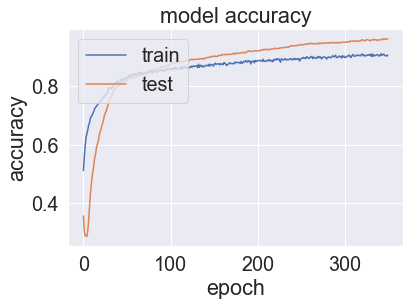

NEURAL NET VALIDATION SET: (Oversample(SMOTE))
0.64
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       167
           1       0.59      0.71      0.64        34

    accuracy                           0.87       201
   macro avg       0.76      0.80      0.78       201
weighted avg       0.88      0.87      0.87       201



In [80]:
print("Train data length: ",len(X_sm))
print("Test data length: ", len(original_ytest))

# ---------OVERSAMPLE NEURAL NETWORK---------
n_inputs = X_sm.shape[1] # Broj feature-a je 31
print("Num Features: ",n_inputs)

#Moraju podaci da se sklairaju inace train/test plot ide u zigzag
scaler = StandardScaler()
scaler = scaler.fit(X_sm)
X_sm_train = scaler.transform(X_sm)
X_sm_test = scaler.transform(original_Xtest)
X_sm_val = scaler.transform(original_Xval)

def create_model(init_mode='lecun_uniform'):
    model = Sequential([
        Dense(n_inputs, input_shape=(n_inputs, ), activation='relu', kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.001)),
        Dense(2, activation='softsign', kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001)),
        Dropout(0.4),
        Dense(2, activation='softsign', kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.0001)),
        Dense(2, activation='softmax')
    ])
    model.compile(Nadam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['acc'])
    return model


"""
#Wrap model into scikit-learn for gridsearchCV
model = KerasClassifier(build_fn=create_model, verbose=0, epochs=100, batch_size=128)
print("Initializing GridSearchCV")
start = time.time()
# define the grid search parameters
batch_size = [8, 32, 64, 128, 256]
epochs = [50,100,200]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
l_activation = ['softmax','sigmoid']

param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1,verbose=3, scoring='f1',cv=3)
grid_result = grid.fit(X_sm, y_sm)
end = time.time()
print("GridSearchCV finished in", end-start)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

"""
start = time.time()
#del mcp_save
# del model
model = create_model()
#mcp_save = ModelCheckpoint("nn_best_v2", save_best_only=True, monitor='val_loss', mode='min')
history = model.fit(X_sm_train, y_sm, validation_split=0.2, batch_size=128, epochs=350, shuffle=False, verbose=2,
                              callbacks=[])
#model.load_weights("nn_best_v2")
predictions_test = np.argmax(model.predict(X_sm_test), axis=-1)
predictions_val = np.argmax(model.predict(X_sm_val), axis=-1)
end = time.time()
print("NN Training finished in", end-start)
print('Neural Net (Oversample(SMOTE)):')
print(f1_score(original_ytest, predictions_test))
print(classification_report(original_ytest, predictions_test))

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print("NEURAL NET VALIDATION SET: (Oversample(SMOTE))")
print(f1_score(original_yval, predictions_val))
print(classification_report(original_yval, predictions_val))


In [83]:
print("Accuracy: ",accuracy_score(original_ytest,predictions))
print("Recall: ",recall_score(original_ytest,predictions))
print(len(original_ytest)/len(original_ytrain))


NameError: name 'predictions' is not defined

In [95]:
#model.save('nn_dsa')

0.6233766233766234
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       190
           1       0.55      0.73      0.62        33

    accuracy                           0.87       223
   macro avg       0.75      0.81      0.77       223
weighted avg       0.89      0.87      0.88       223

Confusion matrix, without normalization
[[170  20]
 [  9  24]]


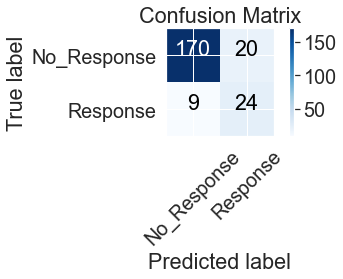

In [84]:
model2 = keras.models.load_model('nn_7428')
predictions = np.argmax(model.predict(X_sm_test), axis=-1)
print(f1_score(original_ytest, predictions))
print(classification_report(original_ytest, predictions))

cm = confusion_matrix(y_true=original_ytest, y_pred=predictions)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm_plot_labels = ['No_Response','Response']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Undersampling

In [85]:
# Shuffle podataka
scaled_df = scaled_df.sample(frac=1)
response_data = scaled_df.loc[scaled_df['Response'] == 1]
print('Number of Responses: ', len(response_data.index))
non_response_data = scaled_df.loc[scaled_df['Response'] == 0][:333]

normal_distributed_data = pd.concat([response_data, non_response_data])
# Shuffle dataframe rows
# Shuffle the data to see if our models can maintain a certain accuracy everytime we run this script
new_data = normal_distributed_data.sample(frac=1, random_state=42)
response = new_data['Response']
new_data.drop(['Response'],axis=1, inplace=True)
new_data['Response'] = response
print('\n')
#print(new_data.head())

Number of Responses:  333




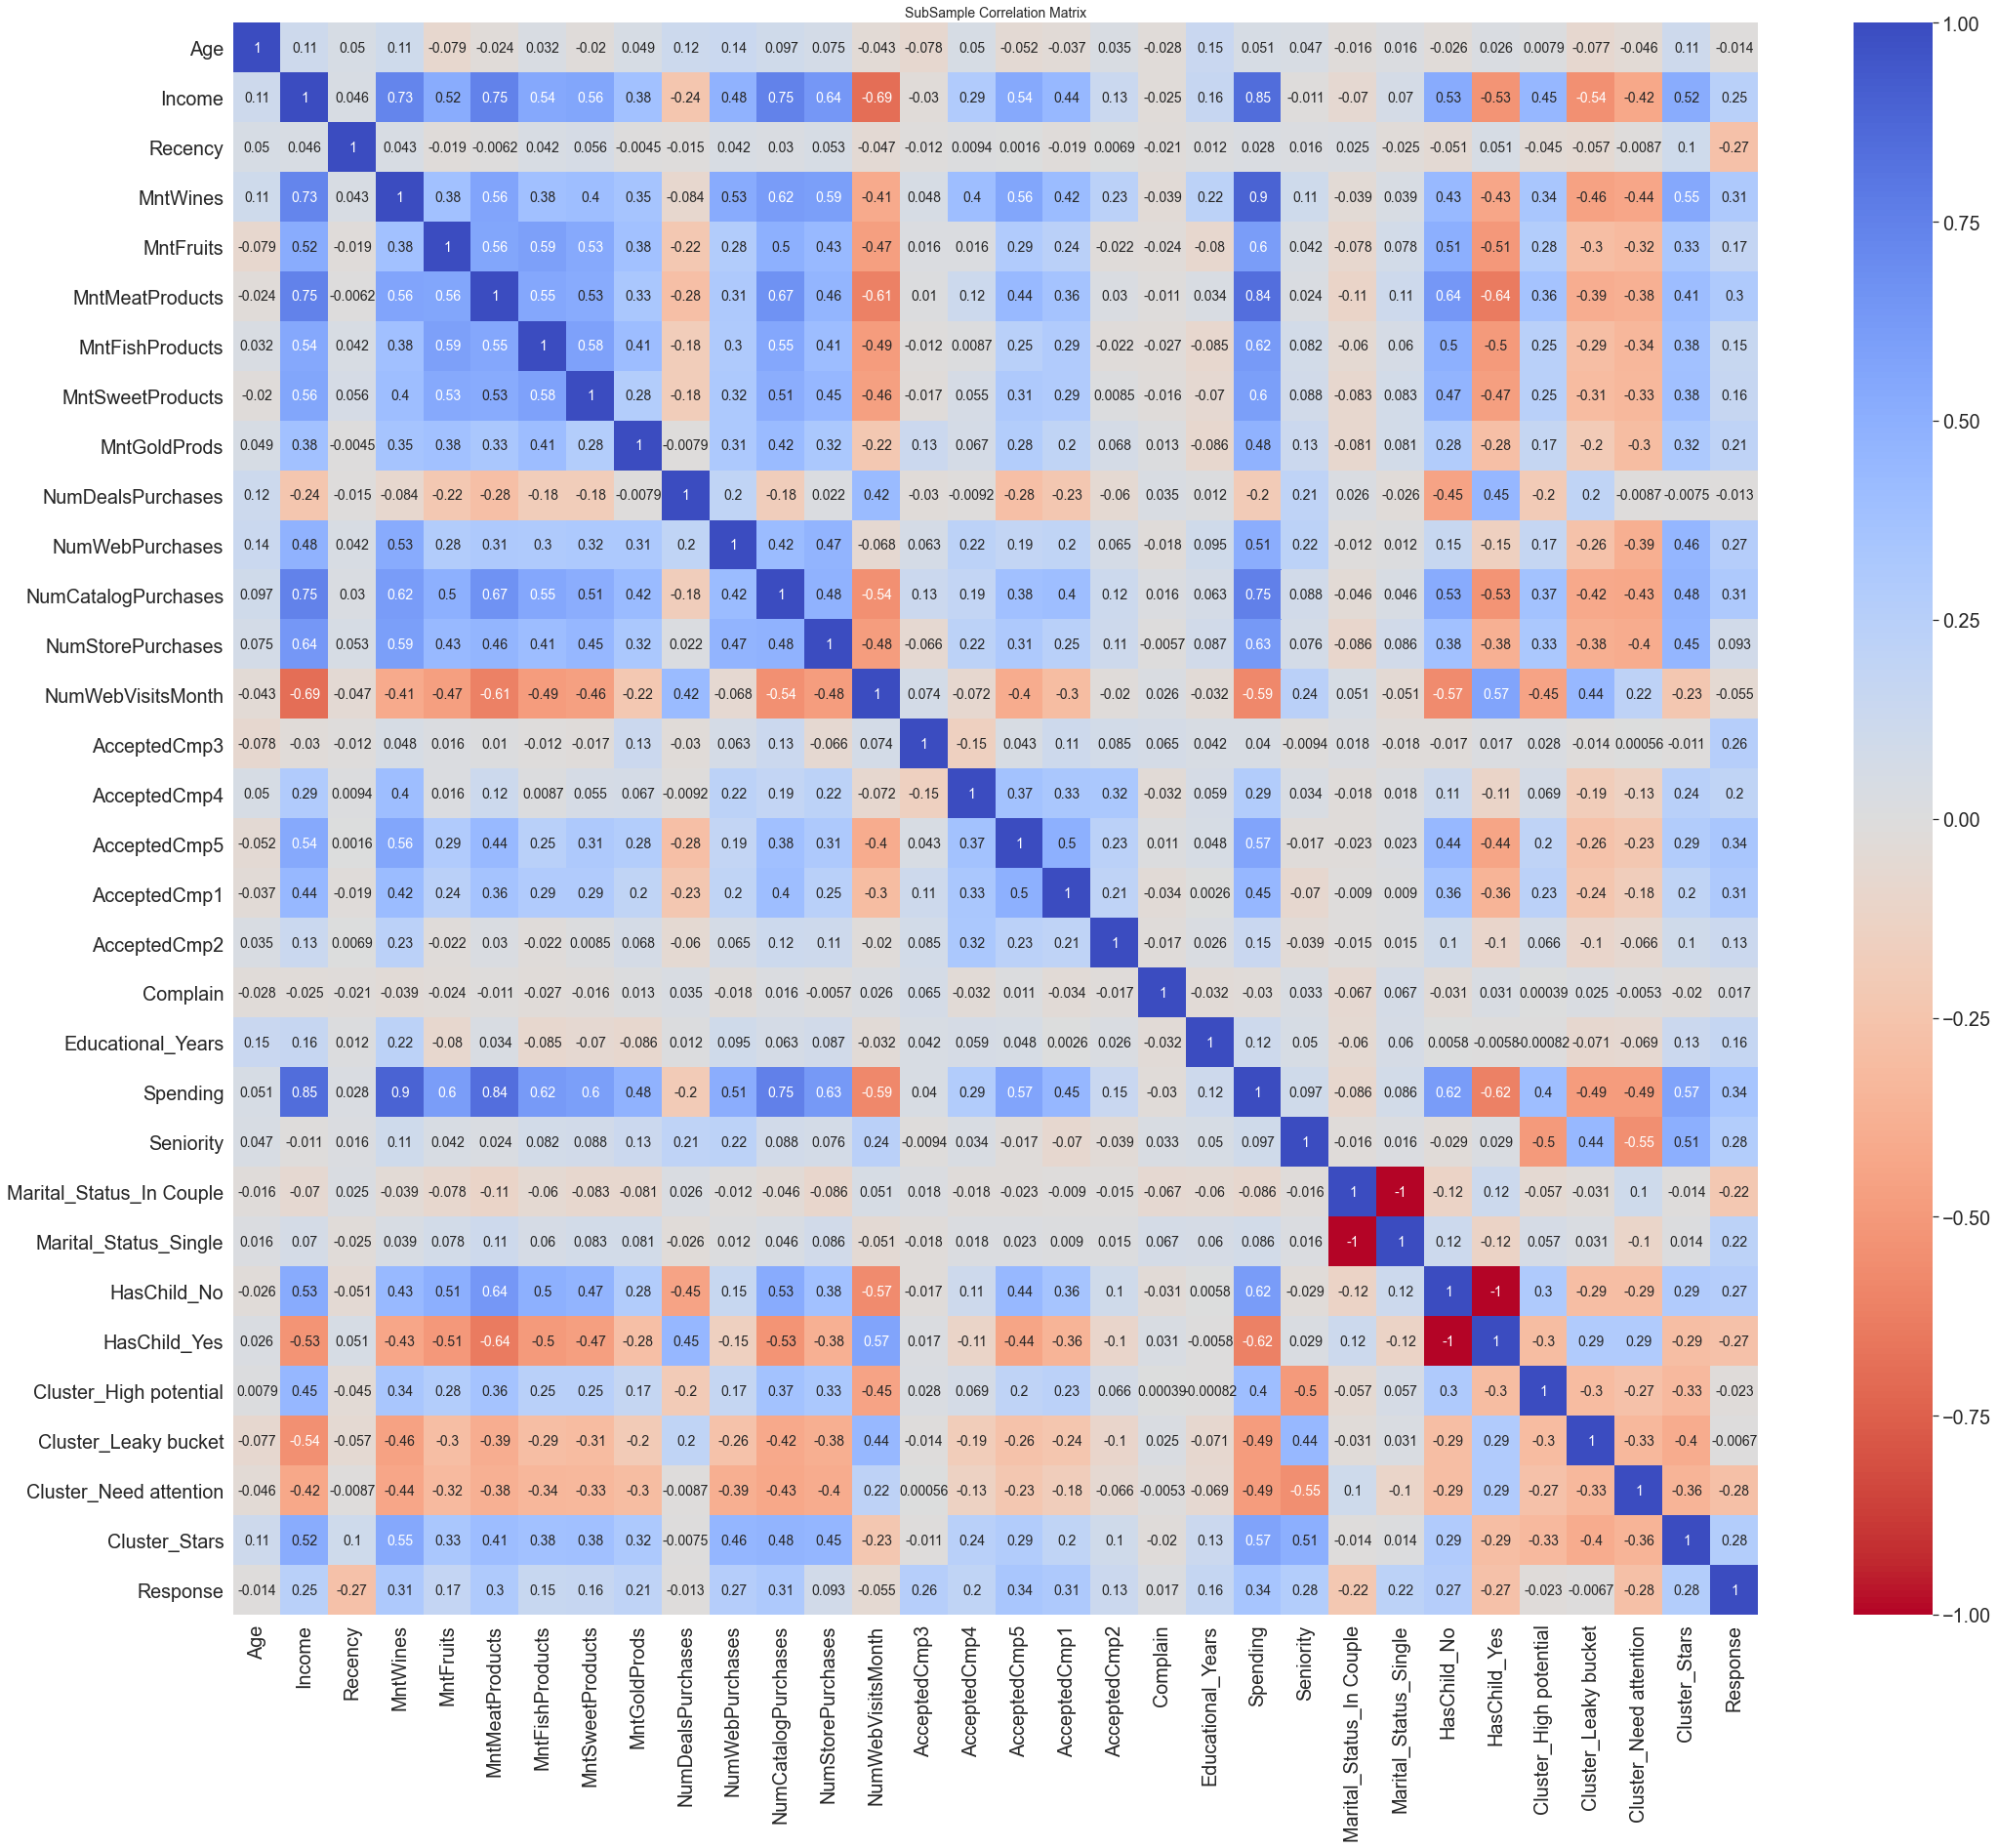

In [86]:
f,  ax2 = plt.subplots(1, 1, figsize=(35, 30))
sns.set(font_scale=1.8)
sub_sample_corr = new_data.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':14}, ax=ax2, annot=True)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

In [87]:
X_u = new_data.drop('Response', axis=1)
y_u = new_data['Response']

# Ovo se koristi samo za undersampling.
X_train, X_test, y_train, y_test = train_test_split(X_u, y_u, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 31)                992       
                                                                 
 dense_9 (Dense)             (None, 32)                1024      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 3,138
Trainable params: 3,138
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
54/54 - 1s - loss: 0.7225 - acc: 0.5718 

Epoch 63/300
54/54 - 0s - loss: 0.4116 - acc: 0.8329 - val_loss: 0.3766 - val_acc: 0.8505 - 42ms/epoch - 778us/step
Epoch 64/300
54/54 - 0s - loss: 0.3981 - acc: 0.8353 - val_loss: 0.3764 - val_acc: 0.8505 - 43ms/epoch - 797us/step
Epoch 65/300
54/54 - 0s - loss: 0.4010 - acc: 0.8353 - val_loss: 0.3762 - val_acc: 0.8505 - 42ms/epoch - 778us/step
Epoch 66/300
54/54 - 0s - loss: 0.3990 - acc: 0.8400 - val_loss: 0.3772 - val_acc: 0.8411 - 42ms/epoch - 778us/step
Epoch 67/300
54/54 - 0s - loss: 0.4026 - acc: 0.8353 - val_loss: 0.3763 - val_acc: 0.8505 - 43ms/epoch - 797us/step
Epoch 68/300
54/54 - 0s - loss: 0.4189 - acc: 0.8400 - val_loss: 0.3754 - val_acc: 0.8505 - 43ms/epoch - 797us/step
Epoch 69/300
54/54 - 0s - loss: 0.3899 - acc: 0.8471 - val_loss: 0.3766 - val_acc: 0.8505 - 42ms/epoch - 779us/step
Epoch 70/300
54/54 - 0s - loss: 0.3928 - acc: 0.8471 - val_loss: 0.3760 - val_acc: 0.8505 - 42ms/epoch - 778us/step
Epoch 71/300
54/54 - 0s - loss: 0.4053 - acc: 0.8376 - val_loss: 0.3740 

Epoch 134/300
54/54 - 0s - loss: 0.3319 - acc: 0.8706 - val_loss: 0.3783 - val_acc: 0.8598 - 43ms/epoch - 797us/step
Epoch 135/300
54/54 - 0s - loss: 0.3093 - acc: 0.8729 - val_loss: 0.3798 - val_acc: 0.8598 - 42ms/epoch - 778us/step
Epoch 136/300
54/54 - 0s - loss: 0.3237 - acc: 0.8776 - val_loss: 0.3816 - val_acc: 0.8505 - 44ms/epoch - 816us/step
Epoch 137/300
54/54 - 0s - loss: 0.3399 - acc: 0.8612 - val_loss: 0.3816 - val_acc: 0.8505 - 44ms/epoch - 816us/step
Epoch 138/300
54/54 - 0s - loss: 0.3161 - acc: 0.8800 - val_loss: 0.3797 - val_acc: 0.8505 - 43ms/epoch - 797us/step
Epoch 139/300
54/54 - 0s - loss: 0.3080 - acc: 0.8776 - val_loss: 0.3833 - val_acc: 0.8505 - 44ms/epoch - 813us/step
Epoch 140/300
54/54 - 0s - loss: 0.3083 - acc: 0.8965 - val_loss: 0.3844 - val_acc: 0.8505 - 44ms/epoch - 816us/step
Epoch 141/300
54/54 - 0s - loss: 0.3142 - acc: 0.8776 - val_loss: 0.3832 - val_acc: 0.8505 - 43ms/epoch - 797us/step
Epoch 142/300
54/54 - 0s - loss: 0.3195 - acc: 0.8894 - val_loss

Epoch 205/300
54/54 - 0s - loss: 0.2617 - acc: 0.9035 - val_loss: 0.4040 - val_acc: 0.8598 - 43ms/epoch - 797us/step
Epoch 206/300
54/54 - 0s - loss: 0.2523 - acc: 0.8965 - val_loss: 0.4057 - val_acc: 0.8598 - 42ms/epoch - 778us/step
Epoch 207/300
54/54 - 0s - loss: 0.2500 - acc: 0.9059 - val_loss: 0.4058 - val_acc: 0.8598 - 42ms/epoch - 778us/step
Epoch 208/300
54/54 - 0s - loss: 0.2366 - acc: 0.9318 - val_loss: 0.4074 - val_acc: 0.8692 - 42ms/epoch - 778us/step
Epoch 209/300
54/54 - 0s - loss: 0.2492 - acc: 0.9129 - val_loss: 0.4074 - val_acc: 0.8692 - 42ms/epoch - 778us/step
Epoch 210/300
54/54 - 0s - loss: 0.2527 - acc: 0.9106 - val_loss: 0.4115 - val_acc: 0.8598 - 41ms/epoch - 760us/step
Epoch 211/300
54/54 - 0s - loss: 0.2668 - acc: 0.8918 - val_loss: 0.4088 - val_acc: 0.8598 - 45ms/epoch - 834us/step
Epoch 212/300
54/54 - 0s - loss: 0.2658 - acc: 0.9082 - val_loss: 0.4098 - val_acc: 0.8598 - 44ms/epoch - 816us/step
Epoch 213/300
54/54 - 0s - loss: 0.2608 - acc: 0.8894 - val_loss

54/54 - 0s - loss: 0.2201 - acc: 0.9176 - val_loss: 0.4511 - val_acc: 0.8505 - 42ms/epoch - 778us/step
Epoch 276/300
54/54 - 0s - loss: 0.2013 - acc: 0.9318 - val_loss: 0.4549 - val_acc: 0.8505 - 42ms/epoch - 778us/step
Epoch 277/300
54/54 - 0s - loss: 0.2103 - acc: 0.9247 - val_loss: 0.4541 - val_acc: 0.8505 - 41ms/epoch - 760us/step
Epoch 278/300
54/54 - 0s - loss: 0.1896 - acc: 0.9341 - val_loss: 0.4531 - val_acc: 0.8505 - 41ms/epoch - 760us/step
Epoch 279/300
54/54 - 0s - loss: 0.2267 - acc: 0.9271 - val_loss: 0.4545 - val_acc: 0.8505 - 42ms/epoch - 778us/step
Epoch 280/300
54/54 - 0s - loss: 0.2111 - acc: 0.9294 - val_loss: 0.4597 - val_acc: 0.8505 - 41ms/epoch - 760us/step
Epoch 281/300
54/54 - 0s - loss: 0.2086 - acc: 0.9200 - val_loss: 0.4532 - val_acc: 0.8505 - 41ms/epoch - 760us/step
Epoch 282/300
54/54 - 0s - loss: 0.2127 - acc: 0.9271 - val_loss: 0.4550 - val_acc: 0.8505 - 42ms/epoch - 778us/step
Epoch 283/300
54/54 - 0s - loss: 0.2151 - acc: 0.9294 - val_loss: 0.4525 - val

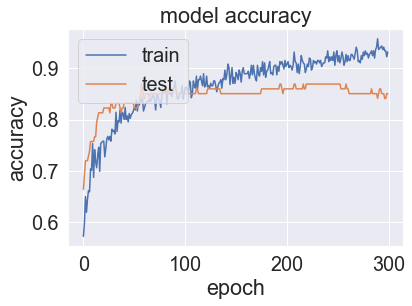

Confusion matrix, without normalization
[[157  33]
 [  2  31]]


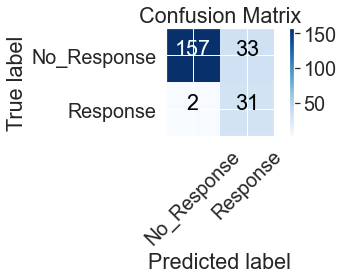

In [88]:
# ---------UNDERSAMPLE MODEL---------
n_inputs = X_train.shape[1]

#Moraju podaci da se sklairaju inace train/test plot ide u zigzag
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_under = scaler.transform(X_train)
Xtest_under = scaler.transform(original_Xtest)

def create_undersample_model(init_mode='lecun_uniform'):
    undersample_model = Sequential([
        Dense(n_inputs, input_shape=(n_inputs, ), activation='relu', kernel_initializer=init_mode, kernel_regularizer=regularizers.l2(0.001)),
        Dense(32, activation='softsign', kernel_regularizer=regularizers.l2(0.0001)),
        Dropout(0.5),
        Dense(32, activation='softsign', kernel_regularizer=regularizers.l2(0.0001)),
        Dense(2, activation='softmax')
    ])
    undersample_model.compile(Nadam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['acc'])
    return undersample_model

#del undersample_model
undersample_model = create_undersample_model()
undersample_model.summary()
undersample_history = undersample_model.fit(X_train_under, y_train, validation_split=0.2, batch_size=8, epochs=300, shuffle=True, verbose=2)
undersample_predictions = np.argmax(undersample_model.predict(Xtest_under), axis=-1)

print('Neural Net (Undersample):')
print(f1_score(original_ytest, undersample_predictions))
print(classification_report(original_ytest, undersample_predictions))

# summarize history for accuracy
plt.plot(undersample_history.history['acc'])
plt.plot(undersample_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

cm = confusion_matrix(y_true=original_ytest, y_pred=undersample_predictions)
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [44]:
#undersample_model.save('undersample_nn_6391')